# 灰色系统理论
## 应用
1. 灰色关联分析
2. 灰色预测：人口预测、灾难预测...
3. 灰色决策
4. 灰色预测控制
## 定义
**灰色系统**：部分信息一致，部分信息未知，系统内各因素间有不确定关系\
**灰色预测法**：对含有不确定因素的系统进行预测。对原始数据进行生成处理来寻找系统变动的规律，生成有较强规律性的数据序列，然后建立相应的微分方程模型
## 常见类型
1. 灰色时间序列预测：利用已有数据预测未来
2. 畸变预测：寻找突变点发生的时间
3. 系统预测：预测系统中众多变量间的相互协调关系（少用）
4. 拓扑预测：预测定值发生的时间
## 灰色关联度分析
### 定义
分析向量与向量之间以及矩阵与矩阵之间的关联度
### 计算过程
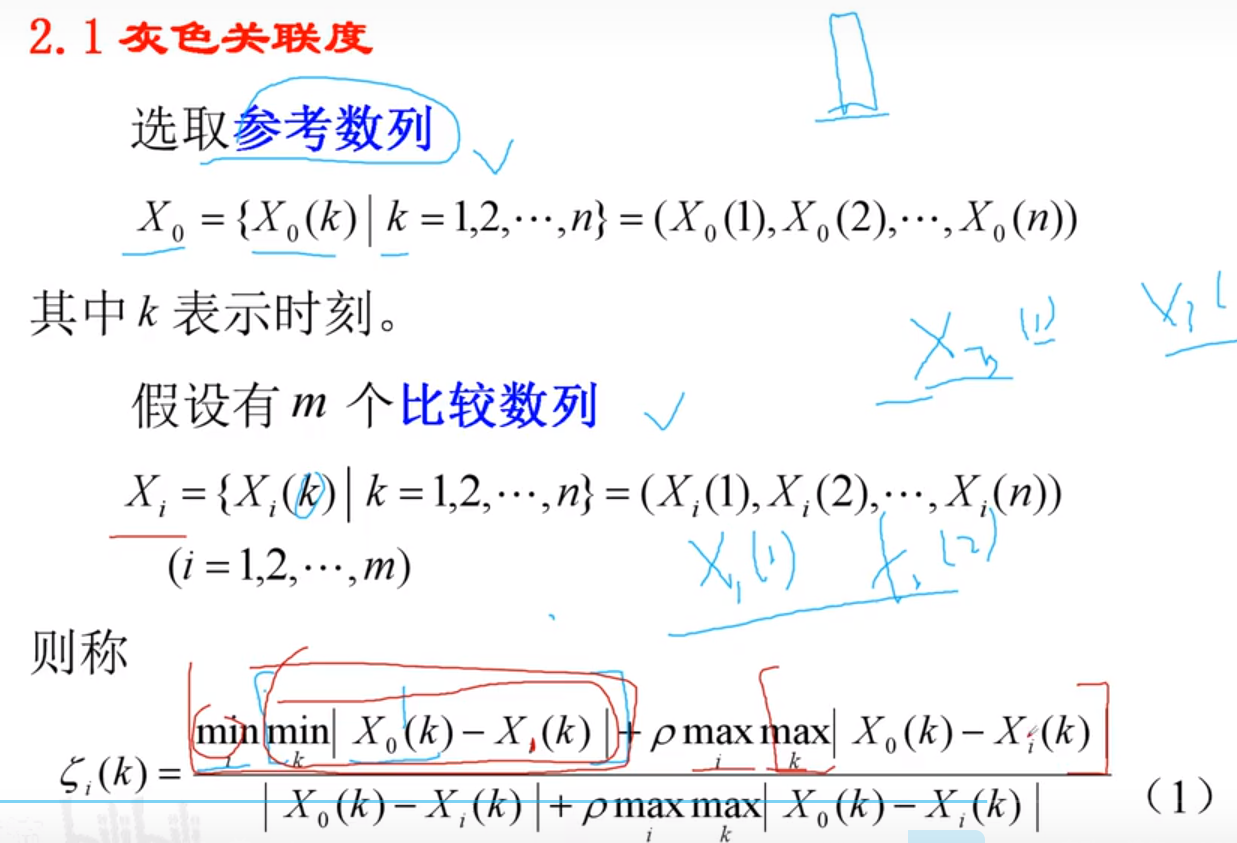
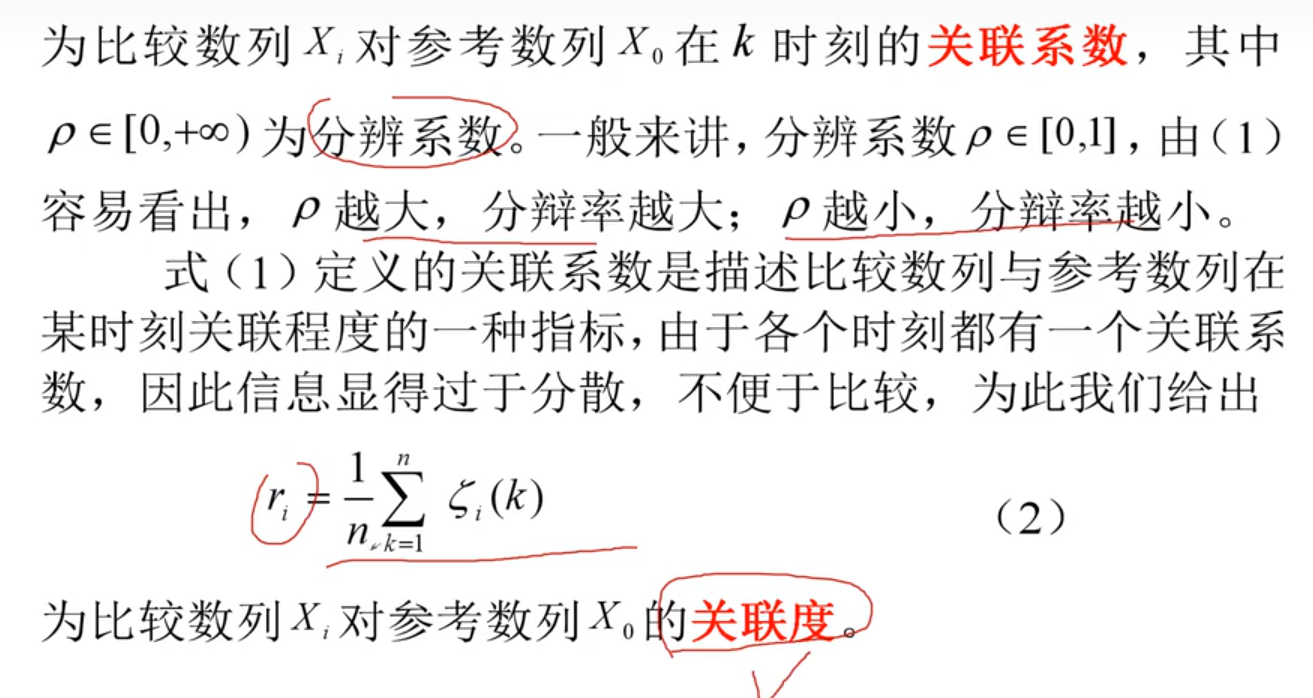
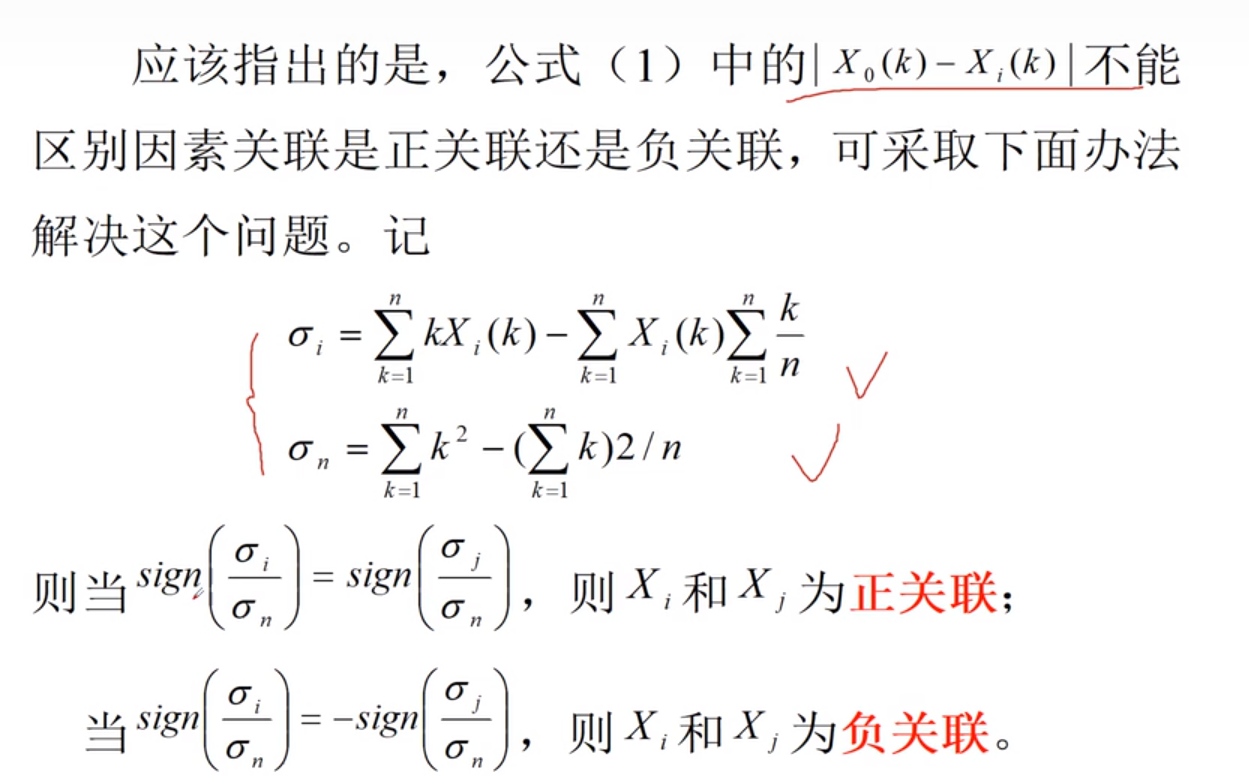
### 示例
分析6位教师工作状况进行评价（排序），以下为量纲一致化后数据
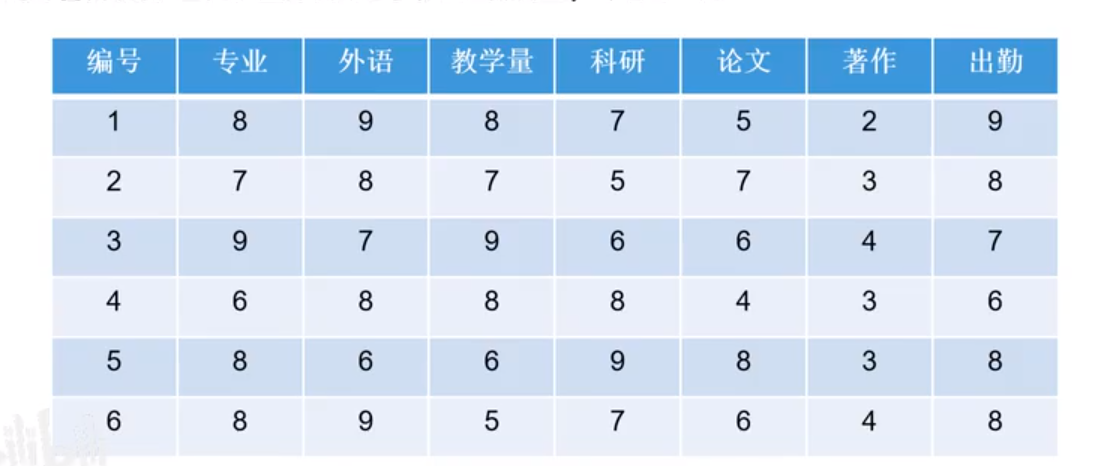



第1名: 老师1，灰色关联度为0.713
第2名: 老师5，灰色关联度为0.683
第3名: 老师3，灰色关联度为0.680
第4名: 老师6，灰色关联度为0.658
第5名: 老师2，灰色关联度为0.614
第6名: 老师4，灰色关联度为0.599


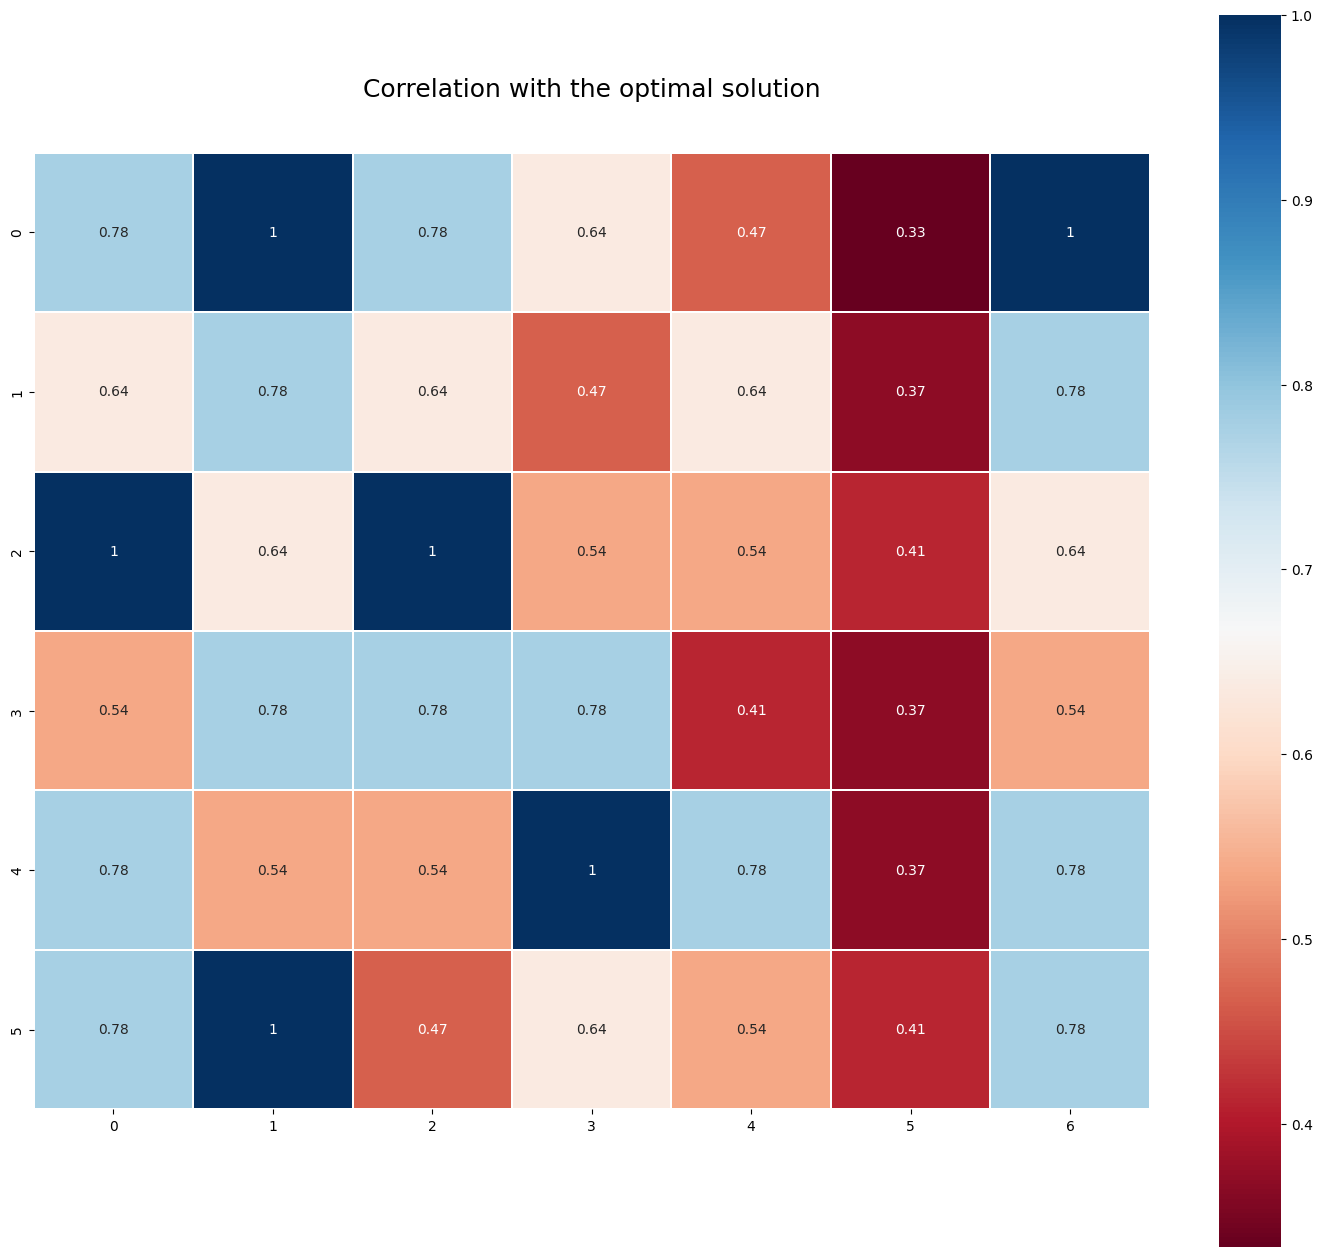

In [30]:
import numpy as np

# 原始数据
data = np.array([[8,9,8,7,5,2,9],
                 [7,8,7,5,7,3,8],
                 [9,7,9,6,6,4,7],
                 [6,8,8,8,4,3,6],
                 [8,6,6,9,8,3,8],
                 [8,9,5,7,6,4,8]])

# 将数据归一化并构造评价矩阵（线性归一化）
def normalize(data):
    return (data-data.min())/(data.max()-data.min())

# 一致化处理(转化为效益性数据)
data1 = np.array([data[:,0].min()/data[:,0],
                  data[:,1]/data[:,1].max(),
                  data[:,2].min()/data[:,2]]).T

B = normalize(data1)

# 确定比较序列和参考数列(比较数列取最大值)
# b0 = np.max(B, axis=0)
# b = B

# 本题是处理后的数据就不需要一致化和归一化了
b0 = np.array([9,9,9,9,9,9,9])
b = data


# 计算灰色关联系数
def grey_relation_coefficient(b, b0, rho):
    n,m = b.shape
    min1 = np.min(np.abs(b0 - b))
    max1 = np.max(np.abs(b0 - b))
    G = np.zeros((n, m))
    for s in range(n):
        for k in range(m):
            d = np.abs(b0[k] - b[s, k])
            G[s, k] = (min1 + rho * max1) / (d + rho * max1)
    return G

rho = 0.5
G = grey_relation_coefficient(b, b0, rho)

# 计算灰色关联度
def grey_relation_degree(G, w=None):
    m, n = G.shape
    if w is None:
        w = np.ones(n) / n
    r = np.dot(G, w)
    return r

w = np.array([1/7,1/7,1/7,1/7,1/7,1/7,1/7])
r = grey_relation_degree(G, w)

# 对结果进行排序并输出
sort_index = np.argsort(-r)
for i in range(len(sort_index)):
    print(f"第{i+1}名: 老师{sort_index[i]+1}，灰色关联度为{r[sort_index[i]]:.3f}")

# 结果可视化
import seaborn as sns # 可视化图形调用库
import matplotlib.pyplot as plt
%matplotlib inline

def ShowGRAHeatMap(data):
    # 色彩集
    colormap = plt.cm.RdBu
    plt.figure(figsize=(18,16))
    plt.title('Correlation with the optimal solution',y=1.05,size=18)
    sns.heatmap(data.astype(float),linewidths=0.1,vmax=1.0,square=True,\
               cmap=colormap,linecolor='white',annot=True)
    plt.show()
ShowGRAHeatMap(G)
